<a href="https://colab.research.google.com/github/mmercan/handson-ml3/blob/main/02_new_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path, "r:gz") as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv("datasets/housing/housing.csv")

housing = load_housing_data()

housing.info()

housing.head(20)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2        496.0       177.0         7.2574            352100.0        NEAR BAY  
3        558.0       219.0         5.6431            341300.0        NEAR BAY  
4        565.0       259.0         3.8462            342200.0        NEAR BAY  
5        413.0       193.0         4.0368            269700.0        NEAR BAY  
6       1094.0       514.0         3.6591            299200.0        NEAR BAY  
7       1157.0       647.0         3.1200            241400.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
9       1551.0       714.0         3.6912            261100.0        NEAR BAY  
10       910.0       402.0         3.2031            281500.0        NEAR BAY  
11      1504.0       734.0         3.2705            241800.0        NEAR BAY  
12      1098.0       468.0         3.0750            213500.0        NEAR BAY  
13       345.0       174.0         2.6736            191300.0        NEAR BAY  
14      1212.0       620.0         1.9167            159200.0        NEAR BAY  
15       697.0       264.0         2.1250            140000.0        NEAR BAY  
16       793.0       331.0         2.7750            152500.0        NEAR BAY  
17       648.0       303.0         2.1202            155500.0        NEAR BAY  
18       990.0       419.0         1.9911            158700.0        NEAR BAY  
19       690.0       275.0         2.6033            162900.0        NEAR BAY

In [3]:
# ocean proximity is categorical feature

housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

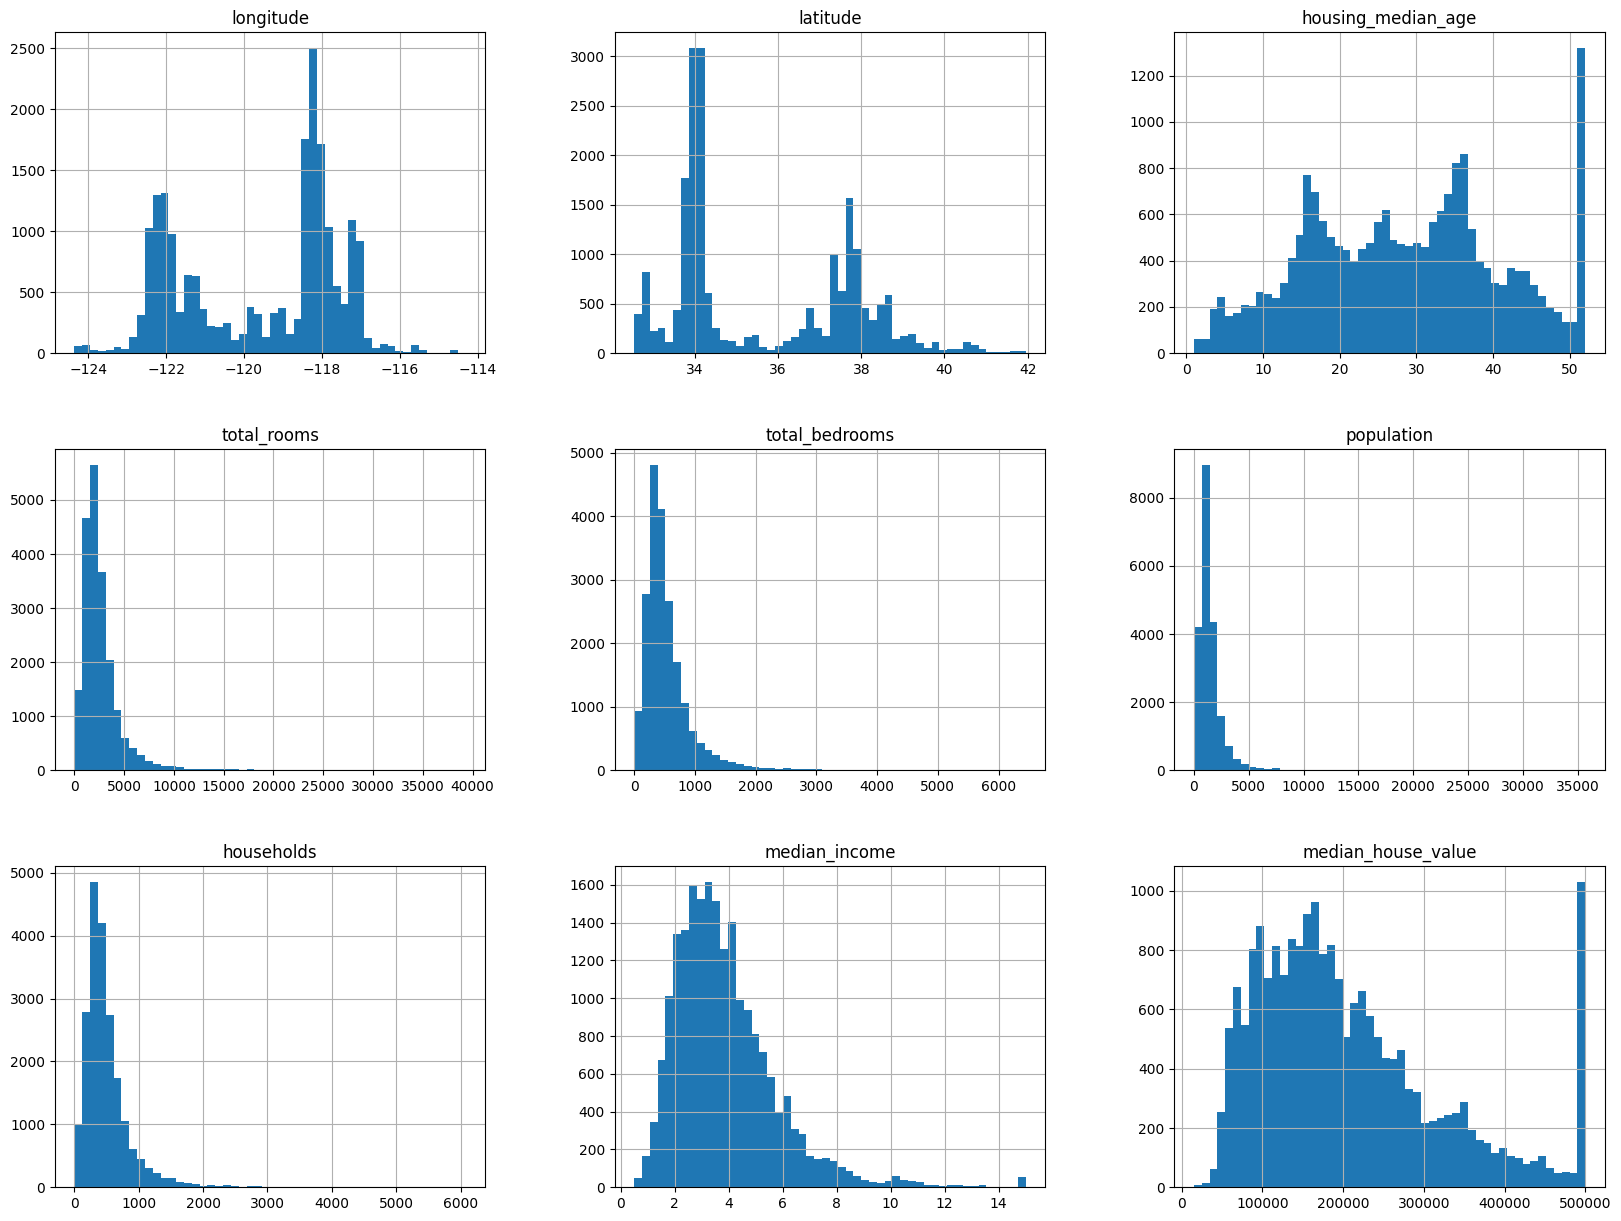

In [4]:
#histogram help us to see the cummulation of data (almost everything has right scew) house median age and value has a cap which is pretty abvious

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# most basic spit to test and train set this has issues when next time you create test and train set as there won't be an inentier for the rows and train set will be seeing test set

import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)

print("train set", len(train_set))
print("test set", len(test_set))

test_set.head()


train set 16512
test set 4128


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
11742    -117.98     33.74                16.0       4636.0           908.0   
16708    -121.39     36.16                28.0       1057.0           249.0   
11591    -120.67     35.30                32.0       4202.0           986.0   
8134     -121.16     39.18                14.0       1006.0           187.0   
19400    -118.61     34.19                28.0       3824.0           749.0   

       population  households  median_income  median_house_value  \
11742      2341.0       825.0         4.4261            304700.0   
16708       288.0       130.0         3.0526            146900.0   
11591      2309.0       956.0         2.2165            231700.0   
8134        462.0       185.0         3.1042            152000.0   
19400      1790.0       701.0         4.1154            246400.0   

      ocean_proximity  
11742       <1H OCEAN  
16708      NEAR OCEAN  
11591      NEAR OCEAN  
8134           INLAND  
19400       <1H OCEAN

In [6]:
# index can be used as idendifier only issue with that any new data has to be added at the end of the document

from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_hash(housing_with_id, 0.2,"index")

print("train set", len(train_set))
print("test set", len(test_set))

test_set.head()


train set 16512
test set 4128


index  longitude  latitude  housing_median_age  total_rooms  \
2       2    -122.24     37.85                52.0       1467.0   
5       5    -122.25     37.85                52.0        919.0   
12     12    -122.26     37.85                52.0       2491.0   
16     16    -122.27     37.85                52.0       1966.0   
23     23    -122.27     37.84                52.0       1688.0   

    total_bedrooms  population  households  median_income  median_house_value  \
2            190.0       496.0       177.0         7.2574            352100.0   
5            213.0       413.0       193.0         4.0368            269700.0   
12           474.0      1098.0       468.0         3.0750            213500.0   
16           347.0       793.0       331.0         2.7750            152500.0   
23           337.0       853.0       325.0         2.1806             99700.0   

   ocean_proximity  
2         NEAR BAY  
5         NEAR BAY  
12        NEAR BAY  
16        NEAR BAY  
23        NEAR BAY

In [7]:
# insated of using index we can also use the location information as idendifier this way we don't have to worry about adding the new data at the end of the document

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_hash(housing_with_id, 0.2, "id")

print("train set", len(train_set))
print("test set", len(test_set))

test_set.head()

train set 16322
test set 4318


index  longitude  latitude  housing_median_age  total_rooms  \
59     59    -122.29     37.82                 2.0        158.0   
60     60    -122.29     37.83                52.0       1121.0   
61     61    -122.29     37.82                49.0        135.0   
62     62    -122.29     37.81                50.0        760.0   
67     67    -122.29     37.80                52.0       1027.0   

    total_bedrooms  population  households  median_income  median_house_value  \
59            43.0        94.0        57.0         2.5625             60000.0   
60           211.0       554.0       187.0         3.3929             75700.0   
61            29.0        86.0        23.0         6.1183             75000.0   
62           190.0       377.0       122.0         0.9011             86100.0   
67           244.0       492.0       147.0         2.6094             81300.0   

   ocean_proximity         id  
59        NEAR BAY -122252.18  
60        NEAR BAY -122252.17  
61        NEAR BAY -122252.18  
62        NEAR BAY -122252.19  
67        NEAR BAY -122252.20

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("train set", len(train_set))
print("test set", len(test_set))

test_set.head()

train set 16512
test set 4128


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -122.38     40.67                10.0       2281.0           444.0   
3024     -118.37     33.83                35.0       1207.0           207.0   
15663    -117.24     32.72                39.0       3089.0           431.0   
20484    -118.44     34.05                18.0       4780.0          1192.0   
9814     -118.44     34.18                33.0       2127.0           414.0   

       population  households  median_income  median_house_value  \
20046      1274.0       438.0         2.2120             65600.0   
3024        601.0       213.0         4.7308            353400.0   
15663      1175.0       432.0         7.5925            466700.0   
20484      1886.0      1036.0         4.4674            500001.0   
9814       1056.0       391.0         4.3750            286100.0   

      ocean_proximity  
20046          INLAND  
3024        <1H OCEAN  
15663      NEAR OCEAN  
20484       <1H OCEAN  
9814        <1H OCEAN

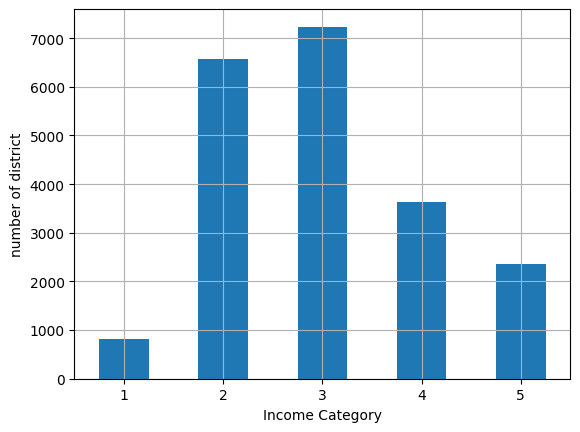

In [9]:
# all split at the top was random even it uses an idendifier sometime you won't want fully random split but you may want sampling rate to match between test and train sets
# like median income and median house prices has corolation and you want to split them right between test and train sets
# first create category from the income  we will use this on splitting the test and train data
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("number of district")
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_split = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.loc[train_index]
    strat_test_set_n = housing.loc[test_index]
    strat_split.append((strat_train_set_n, strat_test_set_n))


strat_train_set, strat_test_set = strat_split[0]
print("train set", len(strat_train_set))
print("test set", len(strat_test_set))
strat_train_set.head()

train set 16512
test set 4128


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity income_cat  
13096        NEAR BAY          2  
14973       <1H OCEAN          5  
3785           INLAND          2  
14689          INLAND          2  
20507      NEAR OCEAN          3

In [11]:
# this method does the same job as above
strat_train_set, strat_test_set = train_test_split(housing,test_size=0.2 , stratify=housing["income_cat"], random_state=42)
print("train set", len(strat_train_set))
print("test set", len(strat_test_set))
strat_train_set.head()

train set 16512
test set 4128


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity income_cat  
13096        NEAR BAY          2  
14973       <1H OCEAN          5  
3785           INLAND          2  
14689          INLAND          2  
20507      NEAR OCEAN          3

In [12]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
# rekove the income_cat category

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


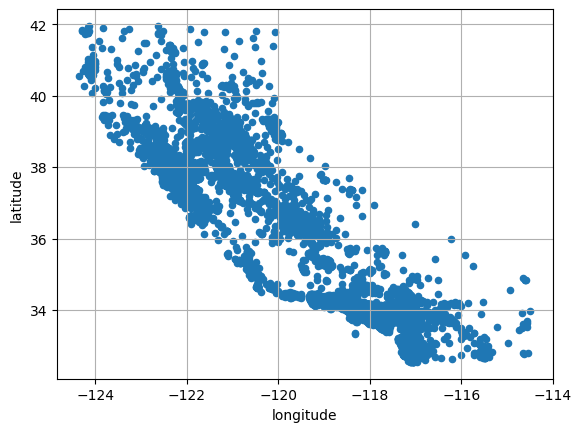

In [14]:
# we will ingore the test set from now on

housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()




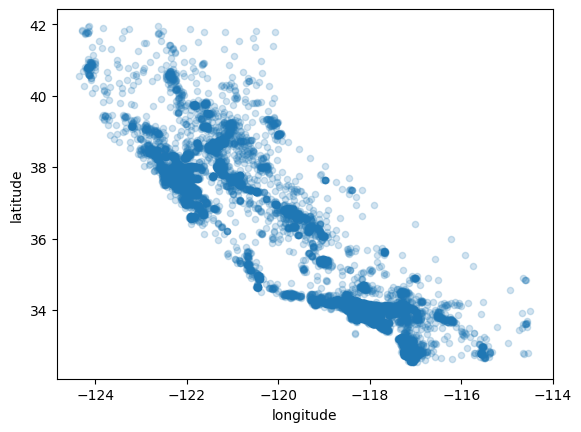

In [15]:
# add alpha to visualize the crowd

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

plt.show()

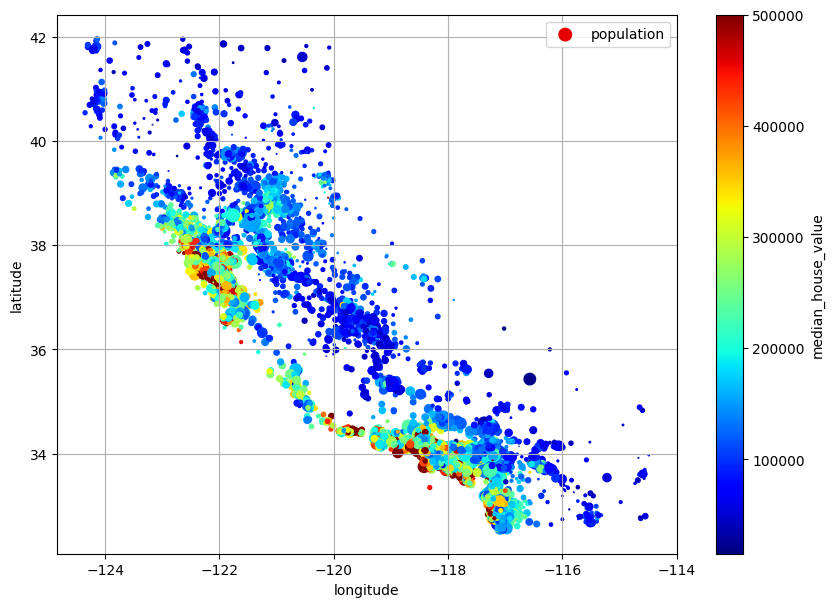

In [16]:
# keep the size for the population and add color for median house prices from blue to red



housing.plot(kind="scatter", x="longitude", y="latitude",grid=True,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True,sharex=False, figsize=(10,7))
plt.show()

california map


In [17]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

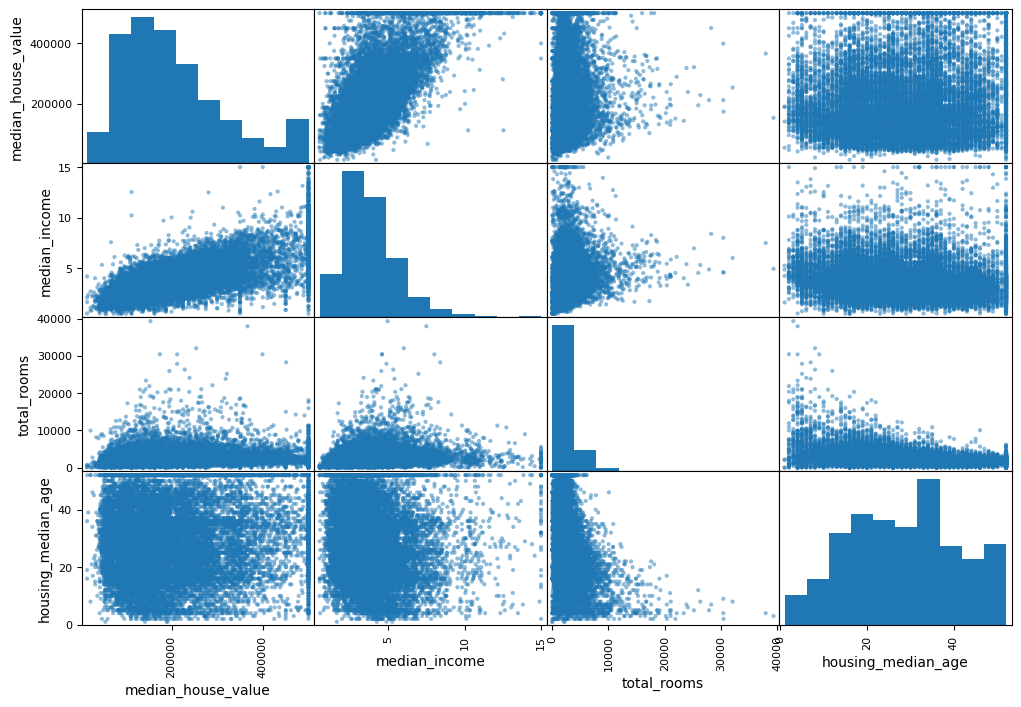

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

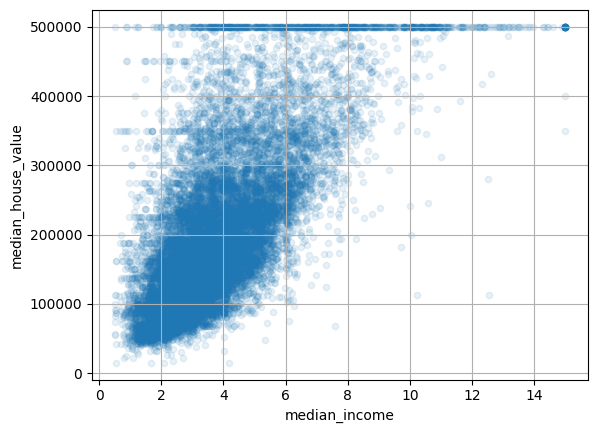

In [19]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",  alpha=0.1, grid=True)
plt.show()

# Enhance the Data

In [20]:
# adding new combination fatures from existed features that may have better meaning like total rooms may not make much sense but average number of rooms per household in a distirct may have more meaningful feature
# same things applies for people per house feature

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688380
rooms_per_household    0.143663
total_rooms            0.137455
housing_median_age     0.102175
households             0.071426
total_bedrooms         0.054635
population            -0.020153
people_per_house      -0.038224
longitude             -0.050859
latitude              -0.139584
bedrooms_per_room     -0.256397
Name: median_house_value, dtype: float64

In [21]:
# label (median_house_value) is still in our training data we should remove it from training data and have a set just labels to validate


housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

housing.head(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
1286     -121.31     37.96                52.0       1829.0           301.0   
18078    -118.36     33.85                34.0       1086.0           197.0   
4396     -122.13     37.41                36.0       4787.0           900.0   
18031    -118.44     34.31                22.0       3182.0           822.0   
6753     -118.13     34.06                17.0       1714.0           572.0   
20615    -121.54     39.08                23.0       1076.0           216.0   
11845    -118.34     34.04                42.0       2010.0           494.0   
13056    -122.02     37.26                34.0       1764.0           243.0   
2543     -122.28     40.50                21.0       2405.0           476.0   
14267    -117.19     32.78                34.0       4108.0           664.0   
17941    -117.91     33.78                26.0       4297.0          1037.0   
7014     -121.09     37.61                42.0       1787.0           296.0   
11562    -122.40     37.78                32.0        352.0           132.0   
8961     -117.66     35.62                11.0       5897.0          1138.0   
10613    -118.32     33.96                47.0       1297.0           292.0   

       population  households  median_income ocean_proximity  
13096      1576.0      1034.0         2.0987        NEAR BAY  
14973       666.0       357.0         6.0876       <1H OCEAN  
3785        562.0       203.0         2.4330          INLAND  
14689      1845.0       780.0         2.2618          INLAND  
20507      1912.0      1172.0         3.5292      NEAR OCEAN  
1286        694.0       319.0         3.3466          INLAND  
18078       509.0       158.0         6.1133       <1H OCEAN  
4396       2039.0       890.0         5.4063        NEAR BAY  
18031      2661.0       746.0         2.7472       <1H OCEAN  
6753       1590.0       568.0         1.1875       <1H OCEAN  
20615       724.0       197.0         2.3598          INLAND  
11845      1203.0       427.0         1.9408       <1H OCEAN  
13056       692.0       223.0         8.0331       <1H OCEAN  
2543       1197.0       412.0         2.6488          INLAND  
14267      1659.0       644.0         4.4097      NEAR OCEAN  
17941      3596.0       967.0         3.0450       <1H OCEAN  
7014        921.0       287.0         3.8864          INLAND  
11562       313.0       105.0         2.5742        NEAR BAY  
8961       2728.0      1072.0         4.1500          INLAND  
10613       704.0       264.0         3.3214       <1H OCEAN

In [22]:
# ML systems don't like null fields we want to find way to clean it from our training data,
# 1 way we can remove the rows which has null data, other way we can remove the feature (column) from set, or we can fill null fields with


# housing.dropna(subset=["total_bedrooms"], inplace=True) # remove district doesn't have total bedrooms
# housing.drop("total_bedrooms", axis=1) # remove total badroom column all together

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) # replace with median value

housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


/tmp/ipython-input-3550752479.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True) # replace with median value


In [23]:
# insated of getting the medium by ourselves we can use SimpleImputer to to STORE median values of every feature of our set, this wan we can

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)



SimpleImputer(strategy='median')

In [24]:
print(imputer.statistics_)

print(housing_num.median().values)

[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]
[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


In [25]:
# you can fill the null fields with "SimpleImputer" too

X = imputer.transform(housing_num)

print(imputer.feature_names_in_)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
print("strategy" ,imputer.strategy)

print(housing_tr.info())
housing_tr.head()
# housing_tr.loc[null_rows_idx].head()

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
strategy median
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
None


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292

# Handling Text and Categorical Attributes

In [26]:
# we like to move the categorical Features to
# we can follow 2 ways
# 1 we can convert categorical attibute to numbers this can work well if distance between the numbers make sense like you can from unsatified to satisfied you have 5 options and then you can resposend them with number
# 2 when numaric values doesn't represend their relation and if you don't have many many options you can convert every option to a new frature
# ocean_proximity is not a good candidate for converting to numerical values creating more features (columns) make more sense

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY

In [27]:
# OrdinalEncoder can convert our categorical values to numeric values


from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print(housing_cat_encoded[:20])

print(ordinal_encoder.categories_)



[[3.]
 [0.]
 [1.]
 [1.]
 [4.]
 [1.]
 [0.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [4.]
 [0.]
 [1.]
 [3.]
 [1.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [28]:
# values in ocean_proximity are  <1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'
# when we convert them to numeric values ML will assume two nearby values are more similar than two distant values which is not true for the ocean_proximity
# that's why we create individual features (columns) for ocean_proximity distinct values

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [29]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                    True                     False
1                   False                      True

In [31]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [32]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
0                       True                   False
1                      False                    True

In [33]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [34]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [35]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [36]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [37]:
df_output


ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     1.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  
1                       0.0                         0.0

# Feature Scaling

when numbers have huge differences between them like total rooms are between 9 to 30000 and median income is between 1 to 15 a lot of models will ignore the samll numbers like the median income and focus more on total rooms, for that
those bumbers will be scaled it can be Min, Max between 0  and 1 or between -1 and 1 (most basic and easiest to understand it won't work well if you have outliers)

or it can be standardization scale which will substact median from the values (standadized values have 0 mean) then it divides the result by standard deviation  ( standardized values have a standard deviation equal to 1)  

In [38]:
# min max between -1 to 1

from sklearn.preprocessing import MinMaxScaler

min_scalar_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_scalar_scaler.fit_transform(housing_num)
housing_num.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292

In [39]:
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [40]:
import sklearn
sklearn.set_config(display='diagram')

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
housing_num_tr = num_pipeline.fit_transform(housing_num)

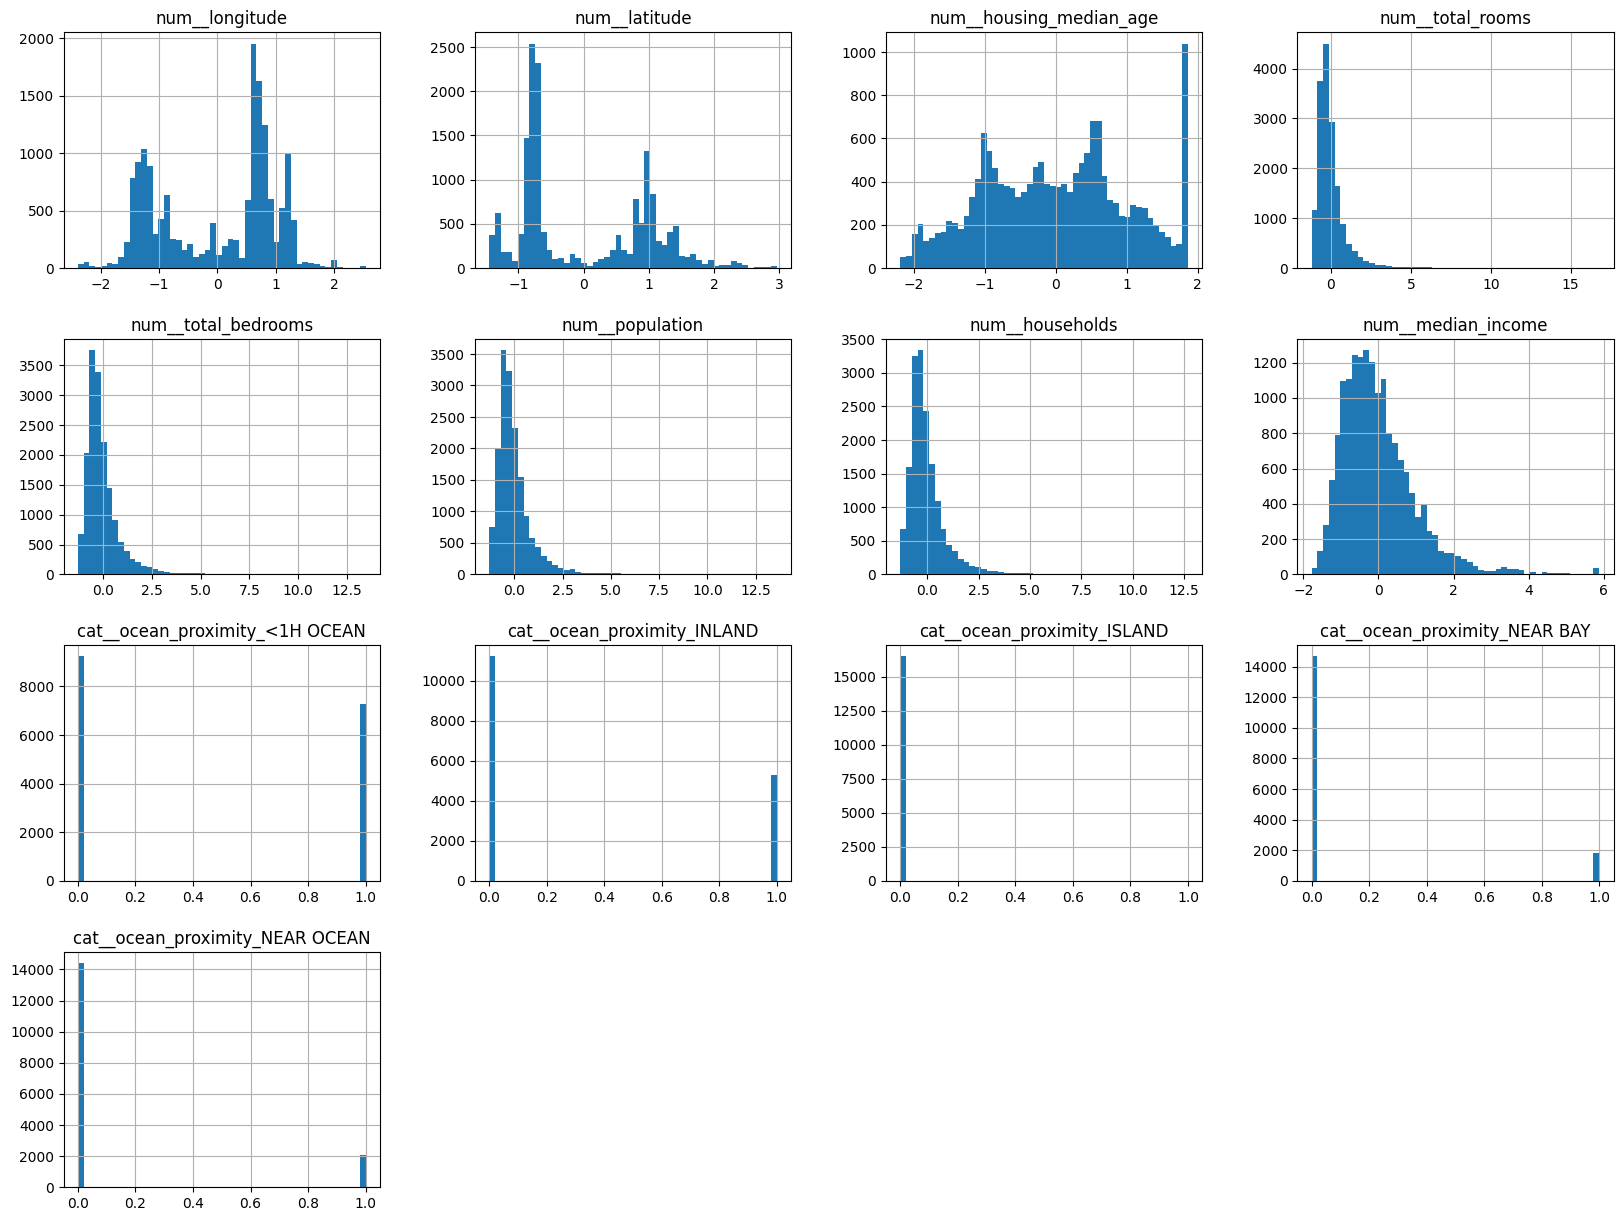

In [42]:
from sklearn.compose import  make_column_selector,  make_column_transformer,ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

house_prepared = preprocessing.fit_transform(housing)

scaled_data_df = pd.DataFrame(house_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)

scaled_data_df.head()


import matplotlib.pyplot as plt
scaled_data_df.hist(bins=50, figsize=(20,15))
plt.show()

In [43]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

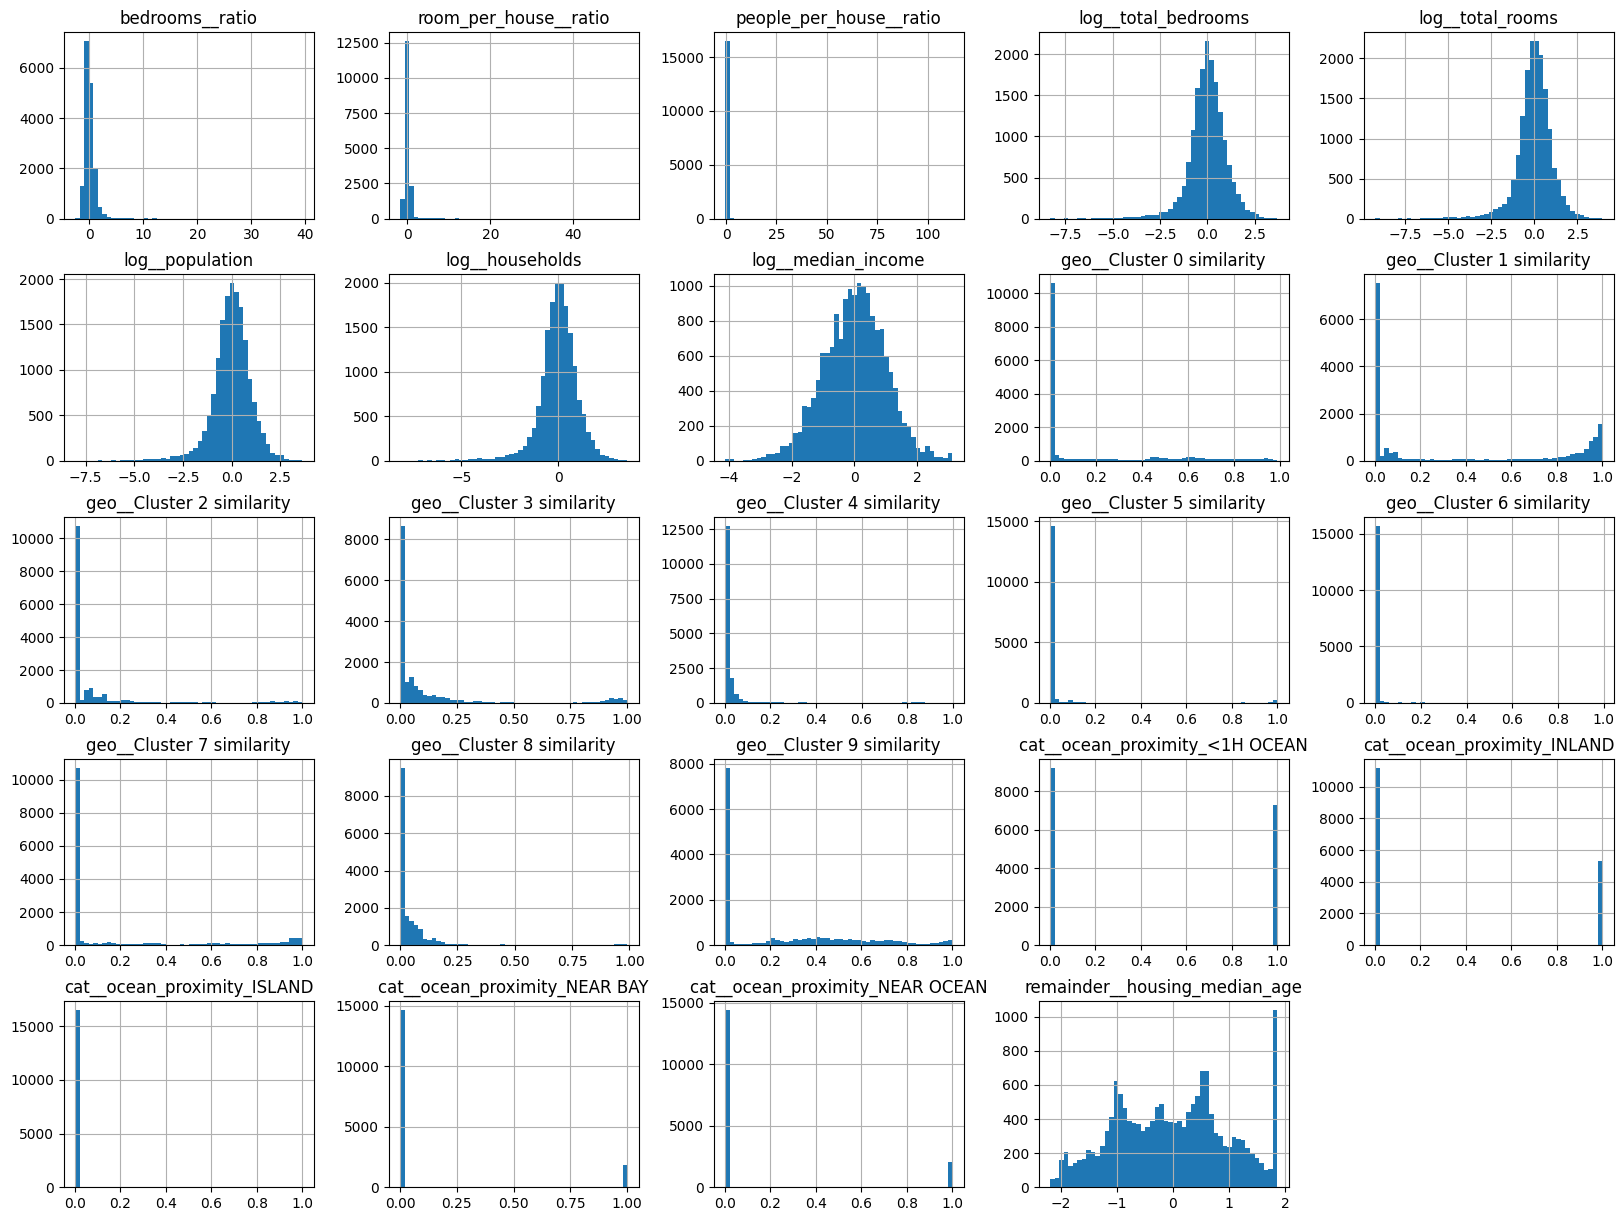

In [44]:
# Whole pipeline to prepeare the Data

from sklearn.preprocessing import FunctionTransformer
import numpy as np

def column_ratio(X):
  return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"), FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms","total_rooms"]),
    ("room_per_house", ratio_pipeline(), ["total_rooms","households"]),
    ("people_per_house", ratio_pipeline(), ["population","households"]),
    ("log", log_pipeline, ["total_bedrooms","total_rooms","population","households", "median_income"]),
    ("geo", cluster_simil, ["latitude","longitude"]),
    ("cat",cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline)

housing_prepared = preprocessing.fit_transform(housing)

housing_prepared.shape


scaled_data_df = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)


import matplotlib.pyplot as plt
scaled_data_df.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
scaled_data_df.head(25)

bedrooms__ratio  room_per_house__ratio  people_per_house__ratio  \
13096         1.846624              -0.866027                -0.330204   
14973        -0.508121               0.024550                -0.253616   
3785         -0.202155              -0.041193                -0.051041   
14689        -0.149006              -0.034858                -0.141475   
20507         0.963208              -0.666554                -0.306148   
1286         -0.743942               0.113646                -0.184066   
18078        -0.489249               0.556477                 0.050602   
4396         -0.389217              -0.024225                -0.158161   
18031         0.675013              -0.456707                 0.128117   
6753          1.816054              -0.941470                -0.044126   
20615        -0.196492               0.008127                 0.152371   
11845         0.484971              -0.285055                -0.040080   
13056        -1.149780               0.959301                 0.024043   
2543         -0.239209               0.153986                -0.020334   
14267        -0.788361               0.364355                -0.094204   
17941         0.417775              -0.387469                 0.162150   
7014         -0.727749               0.305148                 0.047806   
11562         2.440764              -0.811413                -0.003370   
8961         -0.313995               0.023280                -0.101228   
10613         0.172656              -0.205174                -0.073882   
13698         0.304785              -0.422497                 0.163577   
2237         -1.264545               0.936012                -0.048225   
11983        -0.029305               0.119633                -0.006607   
5239         -0.287882              -0.036101                -0.124179   
12020         0.331733              -0.342264                -0.218556   

       log__total_bedrooms  log__total_rooms  log__population  \
13096             1.324114          0.637892         0.456906   
14973            -0.252671         -0.063576        -0.711654   
3785             -0.925266         -0.859927        -0.941997   
14689             0.952773          0.943475         0.670700   
20507             1.437622          1.003590         0.719093   
1286             -0.475568         -0.159448        -0.655784   
18078            -1.058155         -0.856230        -1.076379   
4396              1.029712          1.126642         0.806339   
18031             0.905123          0.580740         1.167537   
6753              0.406790         -0.246253         0.468905   
20615            -0.931614         -0.868595        -0.598371   
11845             0.205308         -0.033309         0.090513   
13056            -0.769742         -0.207817        -0.659699   
2543              0.154297          0.206516         0.083730   
14267             0.611761          0.922170         0.526536   
17941             1.224444          0.982296         1.576053   
7014             -0.498590         -0.190501        -0.271868   
11562            -1.608439         -2.362195        -1.736044   
8961              1.352174          1.405398         1.201273   
10613            -0.517288         -0.618894        -0.636375   
13698            -0.320307         -0.478161         0.123930   
2237             -0.574961          0.057317        -0.528972   
11983            -0.522003         -0.541803        -0.626774   
5239             -0.256559         -0.171193        -0.416279   
12020             0.451699          0.262572        -0.016199   

       log__households  log__median_income  geo__Cluster 0 similarity  \
13096         1.310369           -1.071522               4.581829e-01   
14973        -0.142030            1.194712               6.511495e-10   
3785         -0.913030           -0.756981               3.432506e-01   
14689         0.925373           -0.912253               2.244844e-15   
20507         1.481464    

In [46]:
# most basic model as Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ed...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ed03d6faa90>)])),
                ('linearregression', LinearRegression())])

In [47]:
# we can check the number and see first prediction is over $200.000 off
housing_predictions = lin_reg.predict(housing)
print(housing_predictions[:5].round(-2))
print(housing_labels.iloc[:5].values)

[246000. 372700. 135700.  91400. 330900.]
[458300. 483800. 101700.  96100. 361800.]


In [48]:
#it looks like our model is underfitted and predictios and $68.972 off on average
# we can try more powerfull models for better results

from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68972.88910758484)

In [49]:
# as prediction gives 0 it fits perfectly which means it is overfitted
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
print(np.sqrt(-tree_rmses))

pd.Series(tree_rmses).describe()

[254.18083336 257.69955902 257.3002338  256.63936632 260.93445807
 257.94288725 258.69576519 261.78657464 257.17996724 257.31050545]


count       10.000000
mean    -66551.139927
std       1110.386369
min     -68532.210664
25%     -66826.257468
50%     -66308.879467
75%     -66157.004240
max     -64607.896046
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters':[3,8,10],
    'random_forest__max_features':[4,6,8]},
     {'preprocessing__geo__n_clusters':[10, 15],
    'random_forest__max_features':[6,8, 10]},

]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing, housing_labels)

grid_search.best_params_



In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values("mean_test_score", ascending=False, inplace=True)
cv_res.head()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'preprocessing__geo__n_clusters': randint(low=3, high=50),
        'random_forest__max_features': randint(low=2, high=11),
    }

rnd_search = RandomizedSearchCV(full_pipeline,param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', verbose=2, random_state=42)
rnd_search.fit(housing, housing_labels)

In [ ]:
final_model = rnd_search.best_estimator_
feature_importance= final_model["random_forest"].feature_importances_
feature_importance.raund(2)

In [ ]:
sorted(zip(featue_importance, final_model["preprocessing"].get_feature_names_out()), reverse=True)